In [1]:
import numpy as np
from matplotlib.colors import Normalize
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/lung-cancer/lung-cancer.data'
column_names = ['Age', 'Smoking', 'Yellow_Fingers', 'Anxiety', 'Peer_Pressure', 'Chronic_Lung_Disease',
                'Fatigue', 'Allergy', 'Wheezing', 'Alcohol_Consumption', 'Coughing', 'Shortness_of_Breath',
                'Swallowing_Difficulty', 'Chest_Pain', 'Lung_Cancer']
                
dataset = pd.read_csv(url, names=column_names)

In [3]:
# características (X) y las etiquetas (y) del dataset
X = dataset.drop('Lung_Cancer', axis=1)
y = dataset['Lung_Cancer']

In [4]:
# Escala los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Define los rangos de los parámetros a ajustar
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)


In [6]:
# Realiza una validación cruzada para encontrar los mejores parámetros
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X_scaled, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
             estimator=SVC(),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10]),
                         'gamma': array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])})

Los mejores parámetros son {'C': 100.0, 'gamma': 0.001} con un puntaje de 0.80


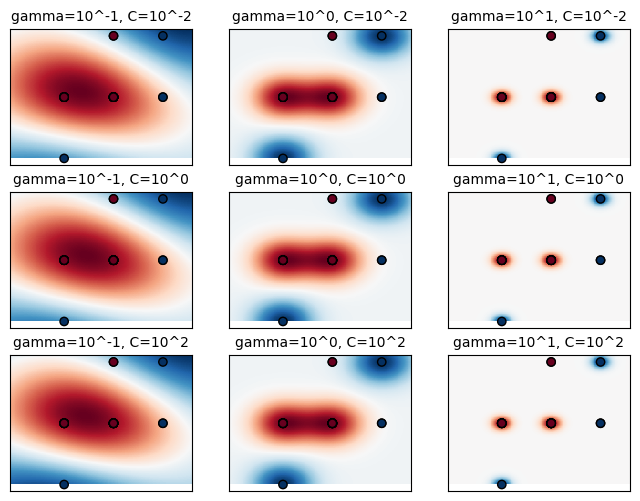

In [7]:
# Imprime los mejores parámetros y el puntaje obtenido
print("Los mejores parámetros son %s con un puntaje de %0.2f" % (grid.best_params_, grid.best_score_))

# Realiza visualizaciones
class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))


classifiers = []
for C in [1e-2, 1, 1e2]:
    for gamma in [1e-1, 1, 1e1]:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X_scaled[:, :2], y)
        classifiers.append((C, gamma, clf))

plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
for k, (C, gamma, clf) in enumerate(classifiers):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(3, 3, k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)), size="medium")
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.RdBu_r, edgecolors="k")
    plt.xticks(())
    plt.yticks(())
    plt.axis("tight")

plt.show()